In [2]:
from sklearn.datasets import load_boston
from random import shuffle
import numpy as np
boston = load_boston()
np.random.seed(0) # creates a replicable shuffling

new_index = list(range(boston.data.shape[0]))
shuffle(new_index) # shuffling the index
x,y = boston.data, boston.target
print (x.shape, y.shape)

(506, 13) (506,)


In [3]:
shuffle.__doc__

'Shuffle list x in place, and return None.\n\n        Optional argument random is a 0-argument function returning a\n        random float in [0.0, 1.0); if it is the default None, the\n        standard random.random will be used.\n\n        '

In [4]:
isinstance(new_index, (list))

True

In [5]:
import pandas as pd
df = pd.DataFrame(x, columns = boston.feature_names)
df['target'] = y

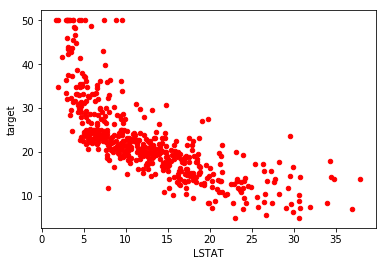

In [6]:
scatter = df.plot(kind = 'scatter', x = 'LSTAT', y = 'target', c = 'r')
import matplotlib.pyplot as plt
plt.show()

In [7]:
from sklearn.feature_selection.univariate_selection import f_regression
P, pval = f_regression(df['LSTAT'],y)
print ("F score for the original feature %.1f" % P)
P, pval = f_regression(np.log(df['LSTAT']),y)
print ("F score for the transformed feature %.1f" % P)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 506]

In [ ]:
help(f_regression)

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
help (f_classif)

In [ ]:
# The following example shows how to test and detect interaction in the
# boston dataset

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
regression = LinearRegression(normalize = True)
crossvalidation = KFold(n = x.shape[0], n_folds = 10, shuffle = True, random_state = 1)

In [ ]:
df = pd.DataFrame(x, columns = boston.feature_names)
baseline = np.mean(cross_val_score(regression, df, y, scoring = 'r2', cv = crossvalidation, n_jobs = 1))
interactions = list()
for feature_A in boston.feature_names:
    for feature_B in boston.feature_names:
        if feature_A > feature_B:
            df['interactions'] = df[feature_A] *df[feature_B]
            score = np.mean(cross_val_score(regression, df, y, scoring = 'r2', cv = crossvalidation, n_jobs = 1))
            if score > baseline:
                interactions.append((feature_A, feature_B, np.round(score,3)))
                
print ('Baseline R2: %.3f' %baseline)
print ('Top interactions: %s' % sorted(interactions, key = lambda x:x[2], reverse = True)[:10])

In [ ]:
colors = ['g' if v > np.mean(y) else 'r' for v in y]

In [ ]:
scatter = df.plot(kind = 'scatter', x = 'RM', y = 'LSTAT', c = colors)
import matplotlib.pyplot as plt
plt.grid()
plt.show()

In [ ]:
polyx = pd.DataFrame(x, columns = boston.feature_names)
baseline = np.mean(cross_val_score(regression, polyx, y, scoring = 'mean_squared_error', cv = crossvalidation, n_jobs = 1))
improvements = [baseline]

for feature_A in boston.feature_names:
    polyx[feature_A + '^2']=polyx[feature_A] **2
    improvements.append(np.mean(cross_val_score(regression, polyx, y,
                                               scoring = 'mean_squared_error', cv = crossvalidation, n_jobs = 1)))

In [ ]:
for feature_B in boston.feature_names:
    if feature_A > feature_B:
        polyx[feature_A+ '*'+feature_B] = polyx[feature_A] * polyx[feature_B]
        improvements.append(np.mean(cross_val_score(regression, polyx, y, 
                                                   scoring = 'mean_squared_error', 
                                                   cv = crossvalidation, n_jobs = 1)))

In [ ]:
print (polyx.shape)
crossvalidation = KFold(n= x.shape[0], n_folds = 10, shuffle = True, random_state = 1)
print ("Mean squared error %.3f" % abs(np.mean(cross_val_score(regression, polyx, y,
                                                              scoring = 'mean_squared_error',
                                                              cv = crossvalidation, n_jobs = 1))))

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
import matplotlib

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
help (lr)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# using the imputer in scikit-learn
from sklearn.preprocessing import Imputer

In [ ]:
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data
